In [45]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [46]:
import io
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Instagram/top_insta_influencers_data.csv')

In [47]:
train

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [49]:
train.columns

Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')

In [50]:
train=train.set_index('rank')

In [51]:
Post=list(train['posts'])
Post1=list()
for num in Post:
  if 'k' in num:
    new_num=1000*float(num.replace('k',''))
    Post1.append(new_num)
  else:
    Post1.append(float(num))
train['posts']=Post1

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel_info       200 non-null    object 
 1   influence_score    200 non-null    int64  
 2   posts              200 non-null    float64
 3   followers          200 non-null    object 
 4   avg_likes          200 non-null    object 
 5   60_day_eng_rate    200 non-null    object 
 6   new_post_avg_like  200 non-null    object 
 7   total_likes        200 non-null    object 
 8   country            138 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 15.6+ KB


In [53]:
train.describe()

,influence_score,posts
count,200.000000,200.000000
mean,81.820000,3499.850000
std,8.878159,3475.828158
min,22.000000,10.000000
25%,80.000000,947.500000
50%,84.000000,2100.000000
75%,86.000000,5025.000000
max,93.000000,17500.000000


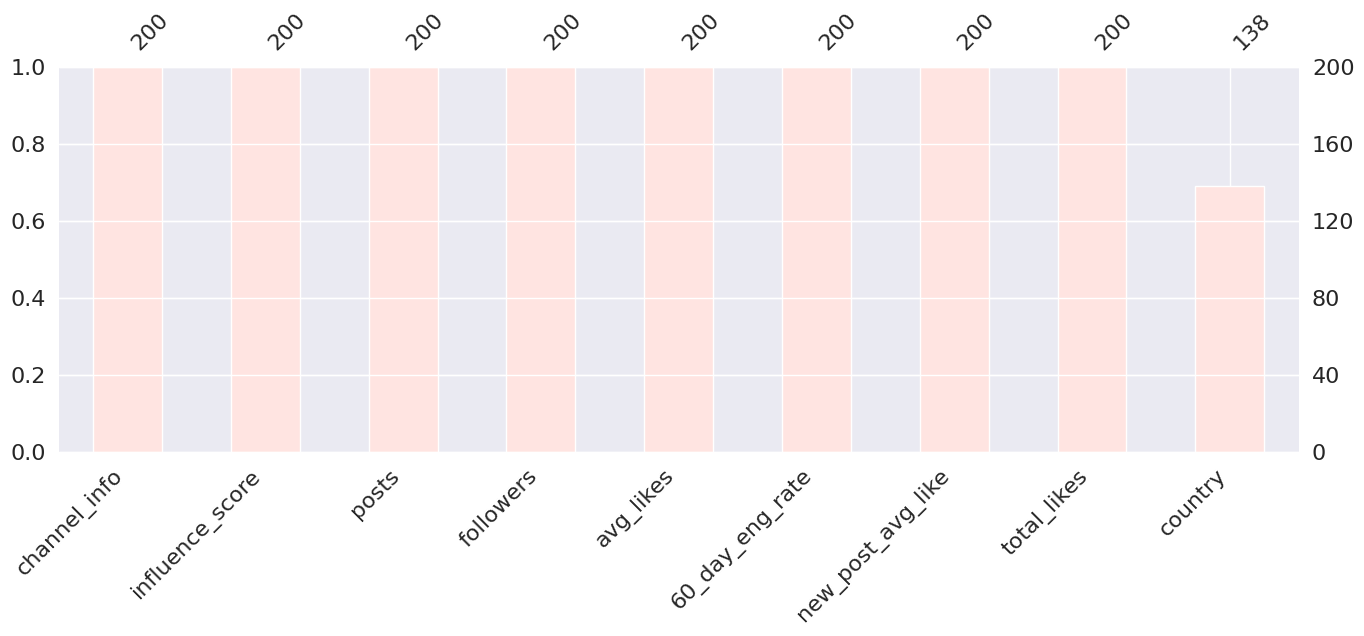

In [54]:
msno.bar(train, figsize = (16,5),color = "#FFE4E1")
plt.show()

In [55]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'channel_info' has '200' unique values
Feature 'influence_score' has '32' unique values
Feature 'posts' has '99' unique values
Feature 'followers' has '165' unique values
Feature 'avg_likes' has '135' unique values
Feature '60_day_eng_rate' has '147' unique values
Feature 'new_post_avg_like' has '162' unique values
Feature 'total_likes' has '116' unique values
Feature 'country' has '26' unique values


In [56]:
train['country'].unique()

array(['Spain', 'United States', nan, 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

<ipython-input-57-1c47b180c525>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)


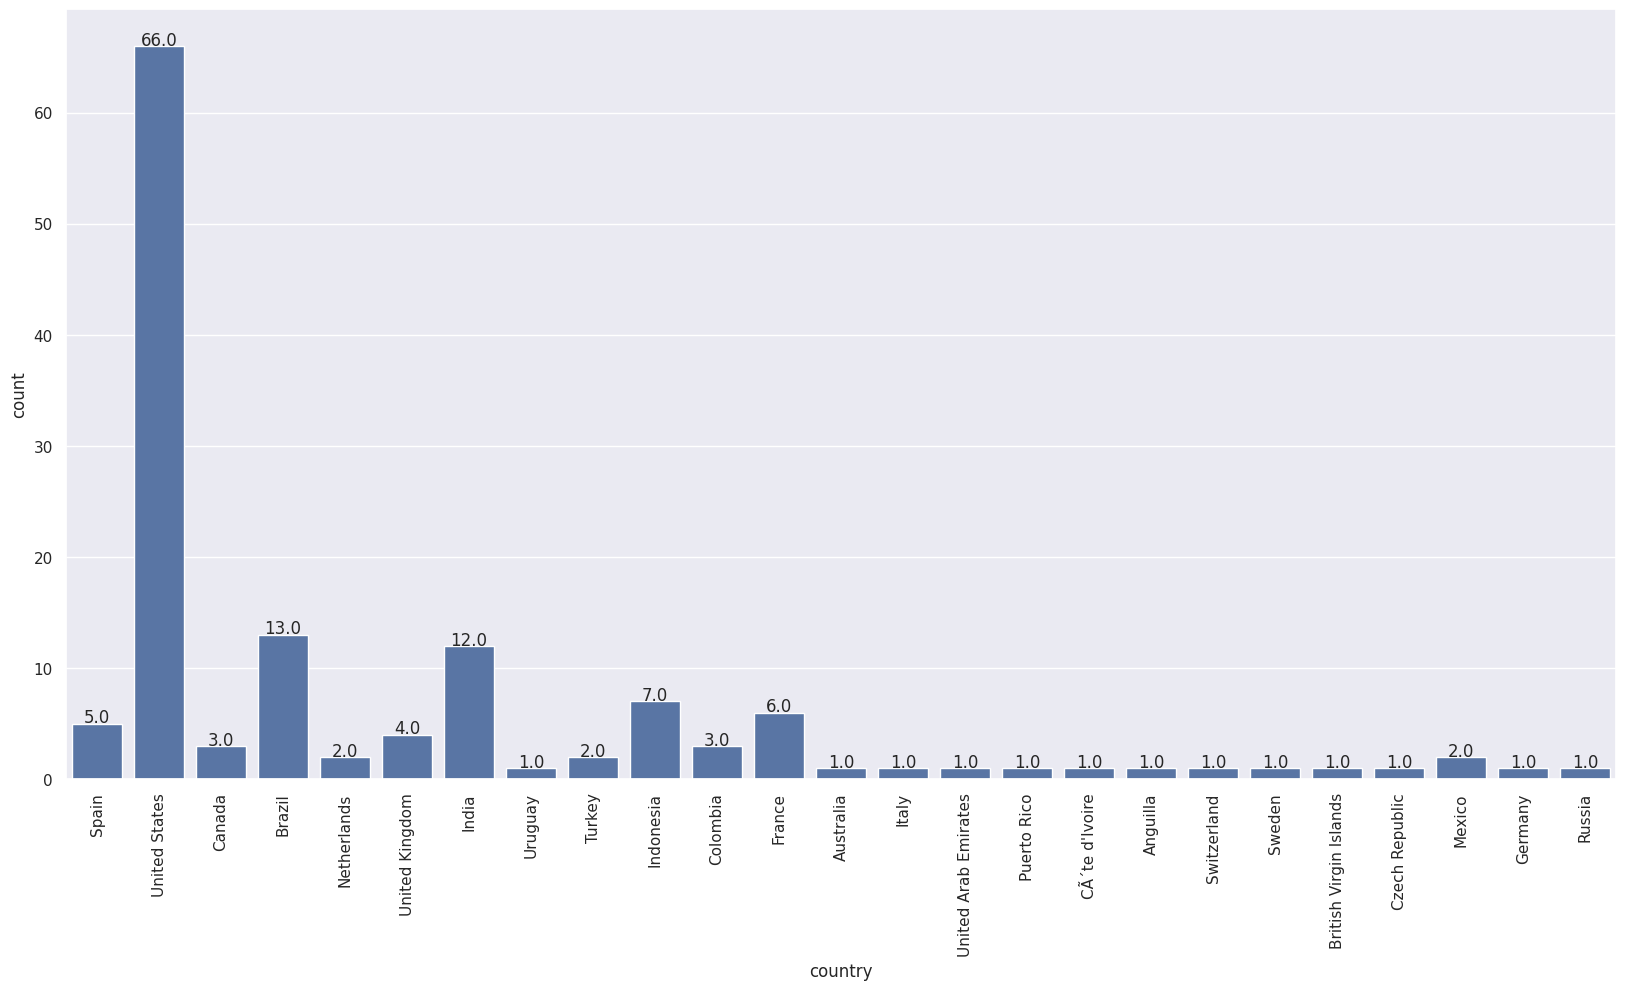

In [57]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x = 'country' , data = train)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [58]:
train.columns

Index(['channel_info', 'influence_score', 'posts', 'followers', 'avg_likes',
       '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country'],
      dtype='object')

In [59]:
num_features=['influence_score', 'followers', 'total_likes','posts']

In [60]:
print(train.columns)

Index(['channel_info', 'influence_score', 'posts', 'followers', 'avg_likes',
       '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country'],
      dtype='object')


In [61]:
print(column_name)

country


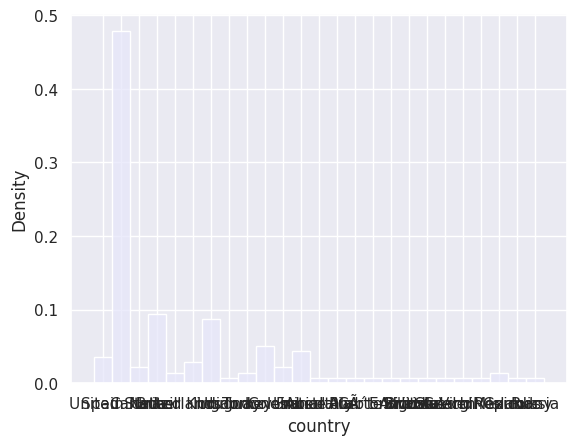

In [62]:
if column_name in train.columns:
  # Column exists, proceed with plotting
  sns.histplot(train[column_name], stat='density',color='#E6E6FA')
else:
  # Column does not exist, handle the error
  print("Error: Column '{}' not found in DataFrame 'train'".format(column_name))

In [63]:
# Remove non-numeric characters from 'followers' column
train['followers'] = train['followers'].str.replace('[^0-9.]', '', regex=True)

# Convert 'followers' column to float
train['followers'] = train['followers'].astype(float)

In [64]:
# Remove non-numeric characters from 'followers' column
train['total_likes'] = train['total_likes'].str.replace('[^0-9.]', '', regex=True)

# Convert 'followers' column to float
train['total_likes'] = train['total_likes'].astype(float)

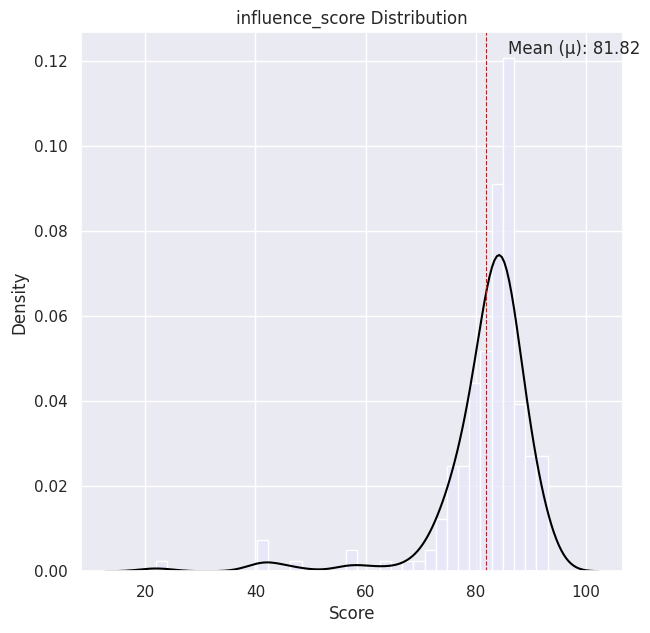

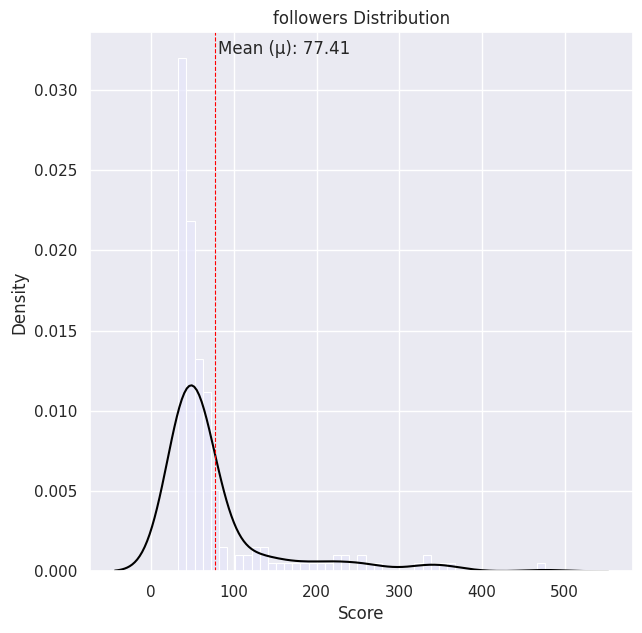

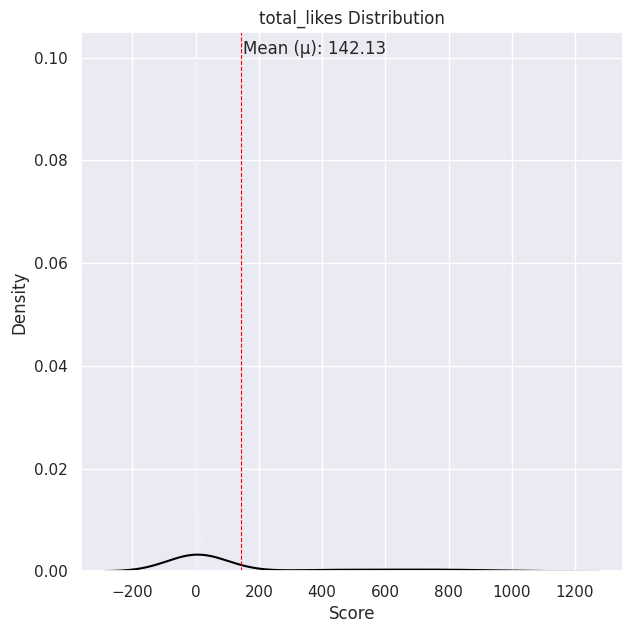

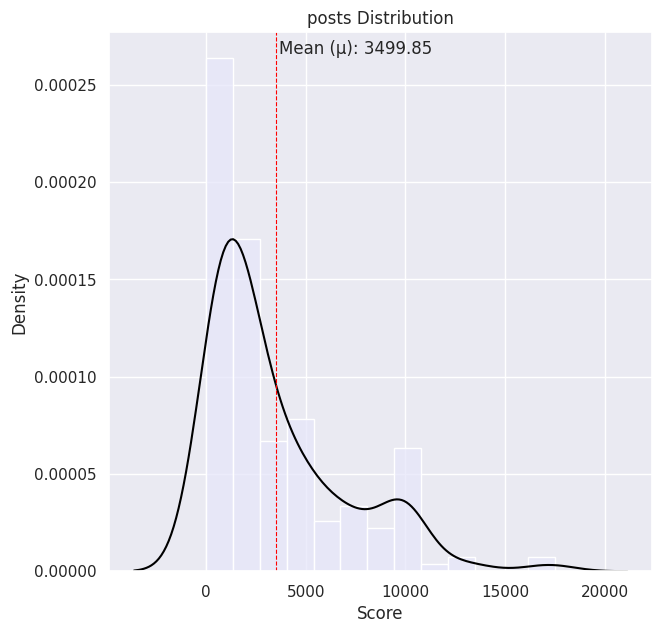

In [65]:
for column_name in num_features:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(train[column_name], stat='density',color='#E6E6FA')
  sns.kdeplot(train[column_name].astype(float), color='black')
  plt.axvline(train[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(train[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(train[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

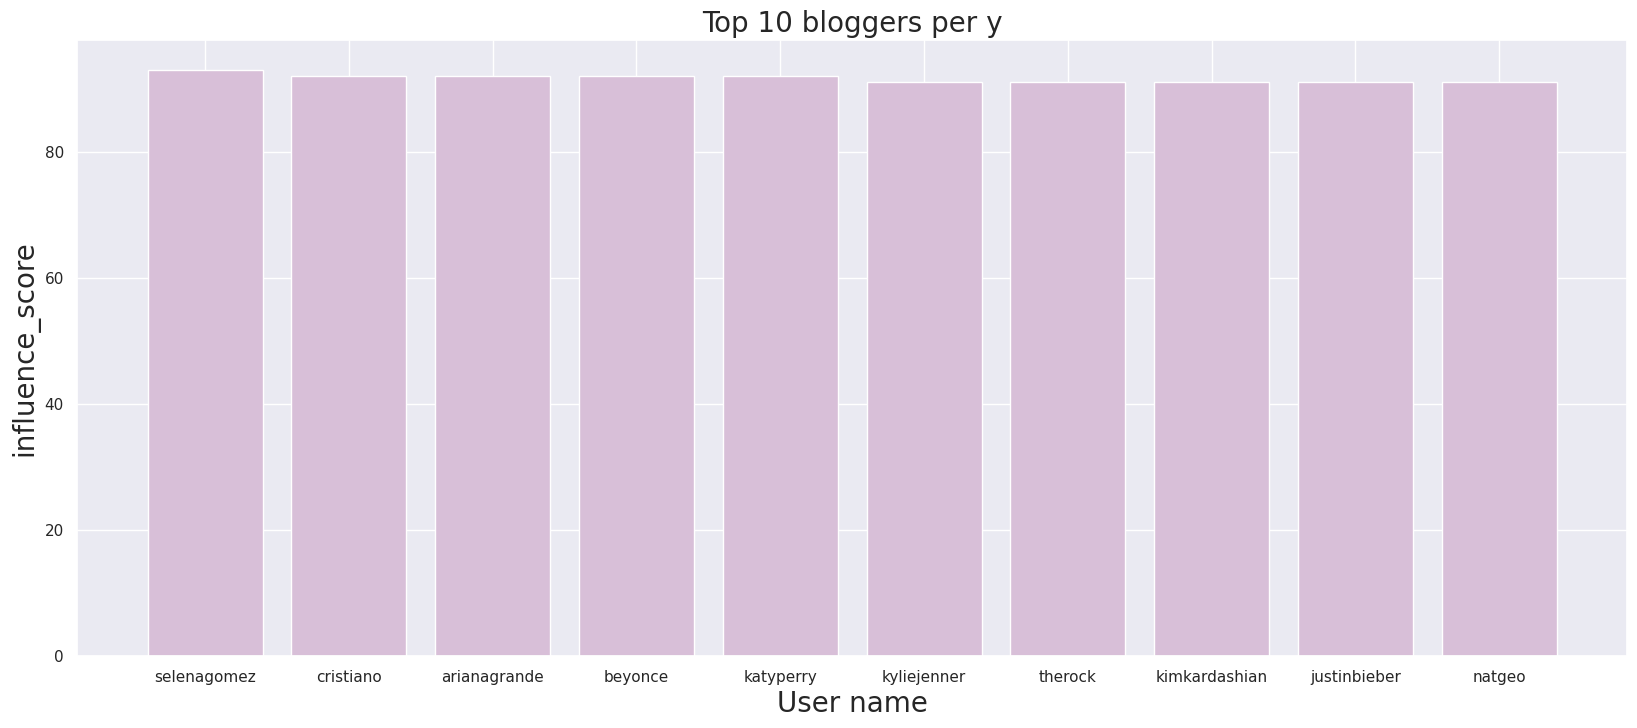

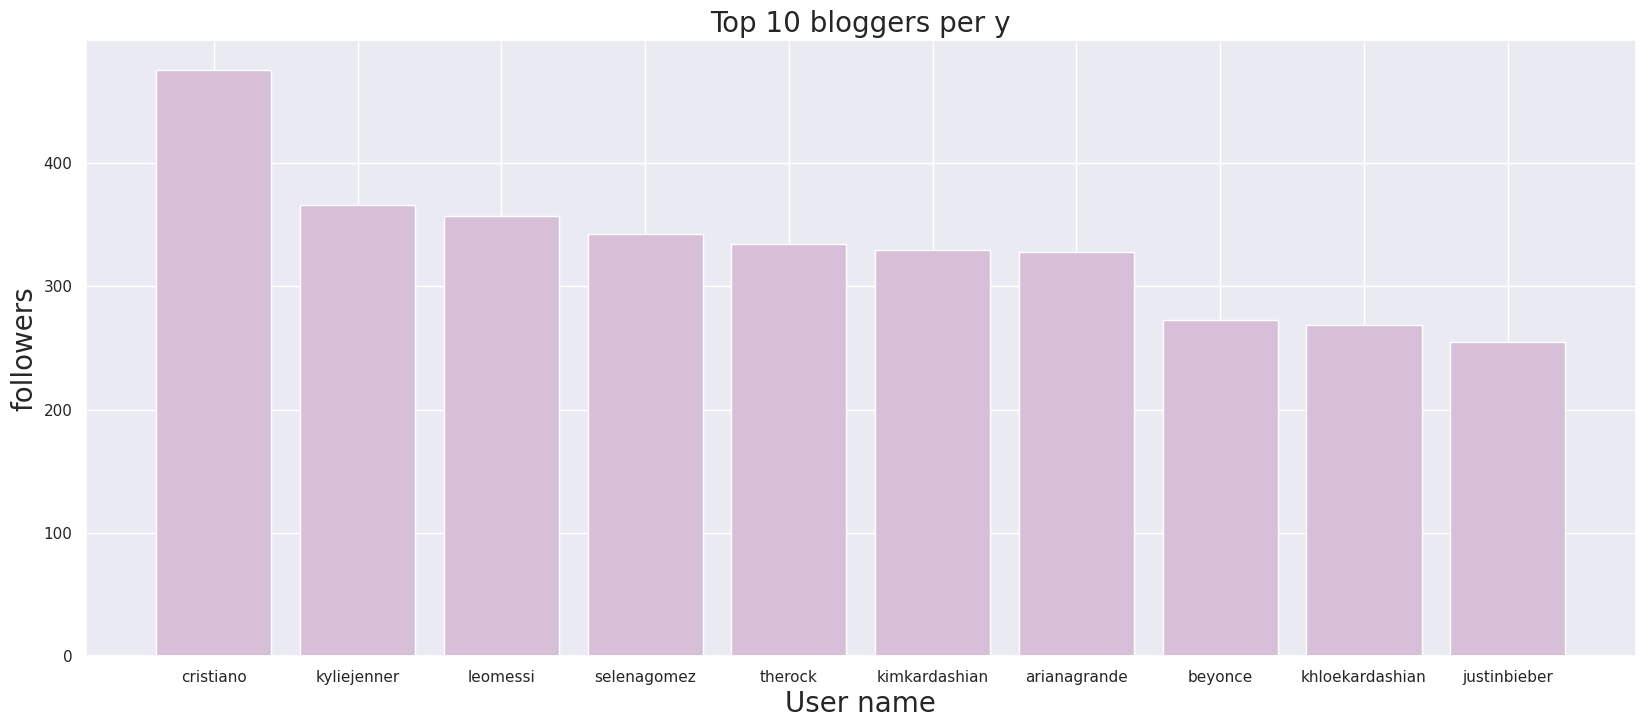

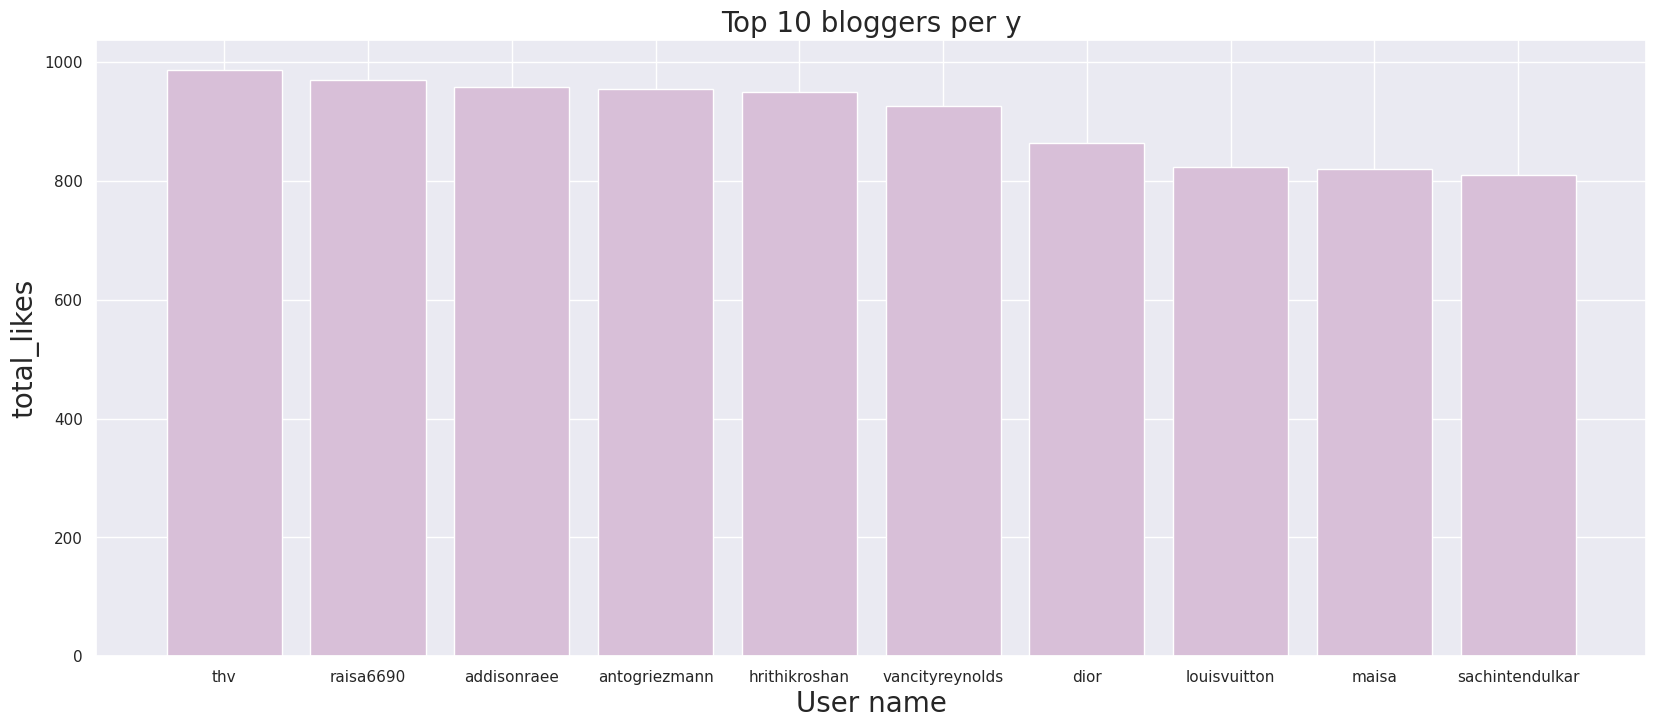

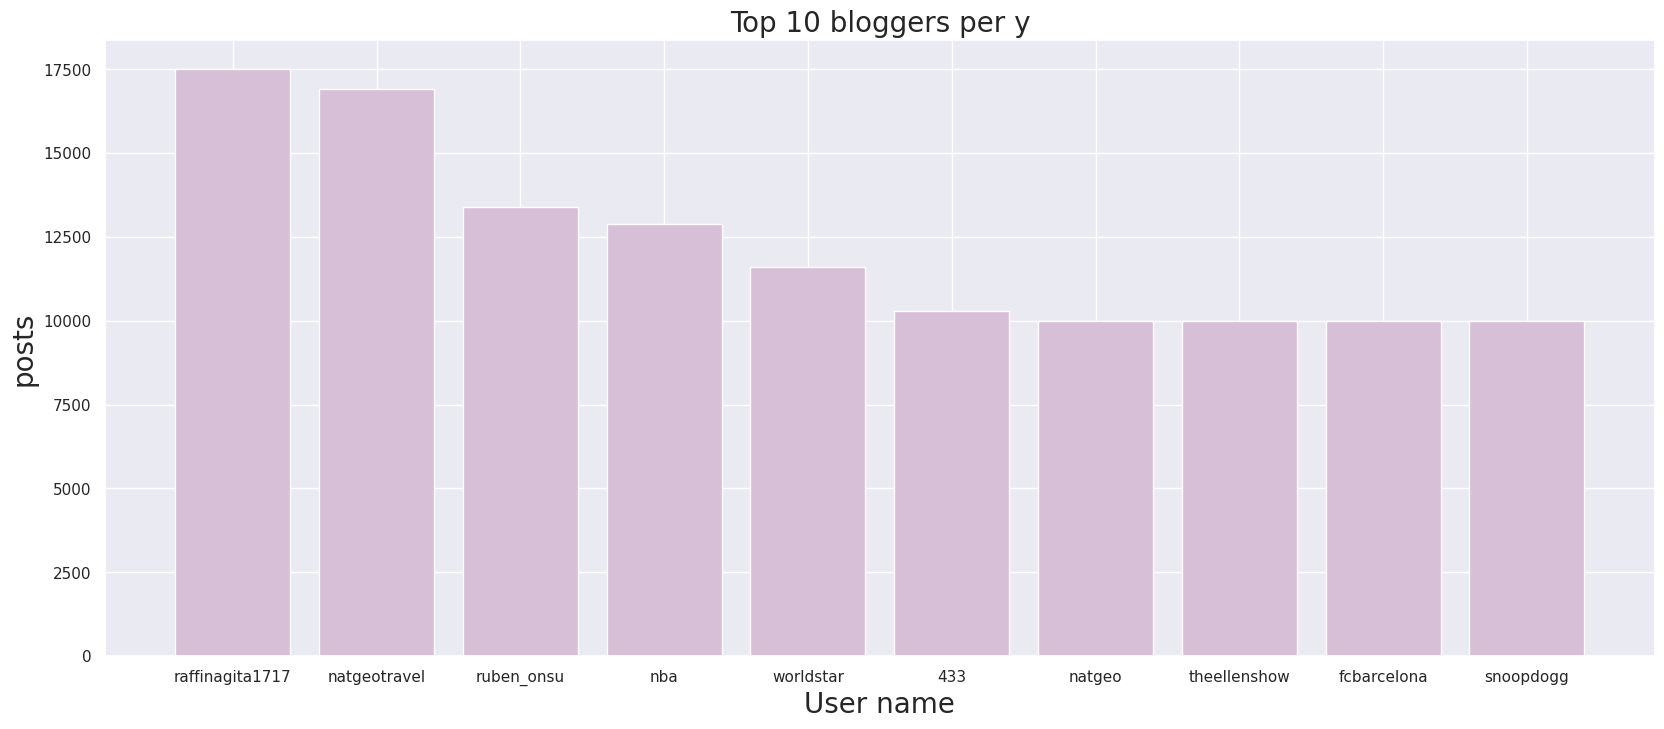

In [66]:
for column in num_features:
  top10 = train.nlargest(10,column)
  plt.figure(figsize=(20,8))
  plt.bar(top10['channel_info'], top10[column],color='#D8BFD8')
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("User name", fontsize = 20)
  plt.title("Top 10 bloggers per y", fontsize = 20)

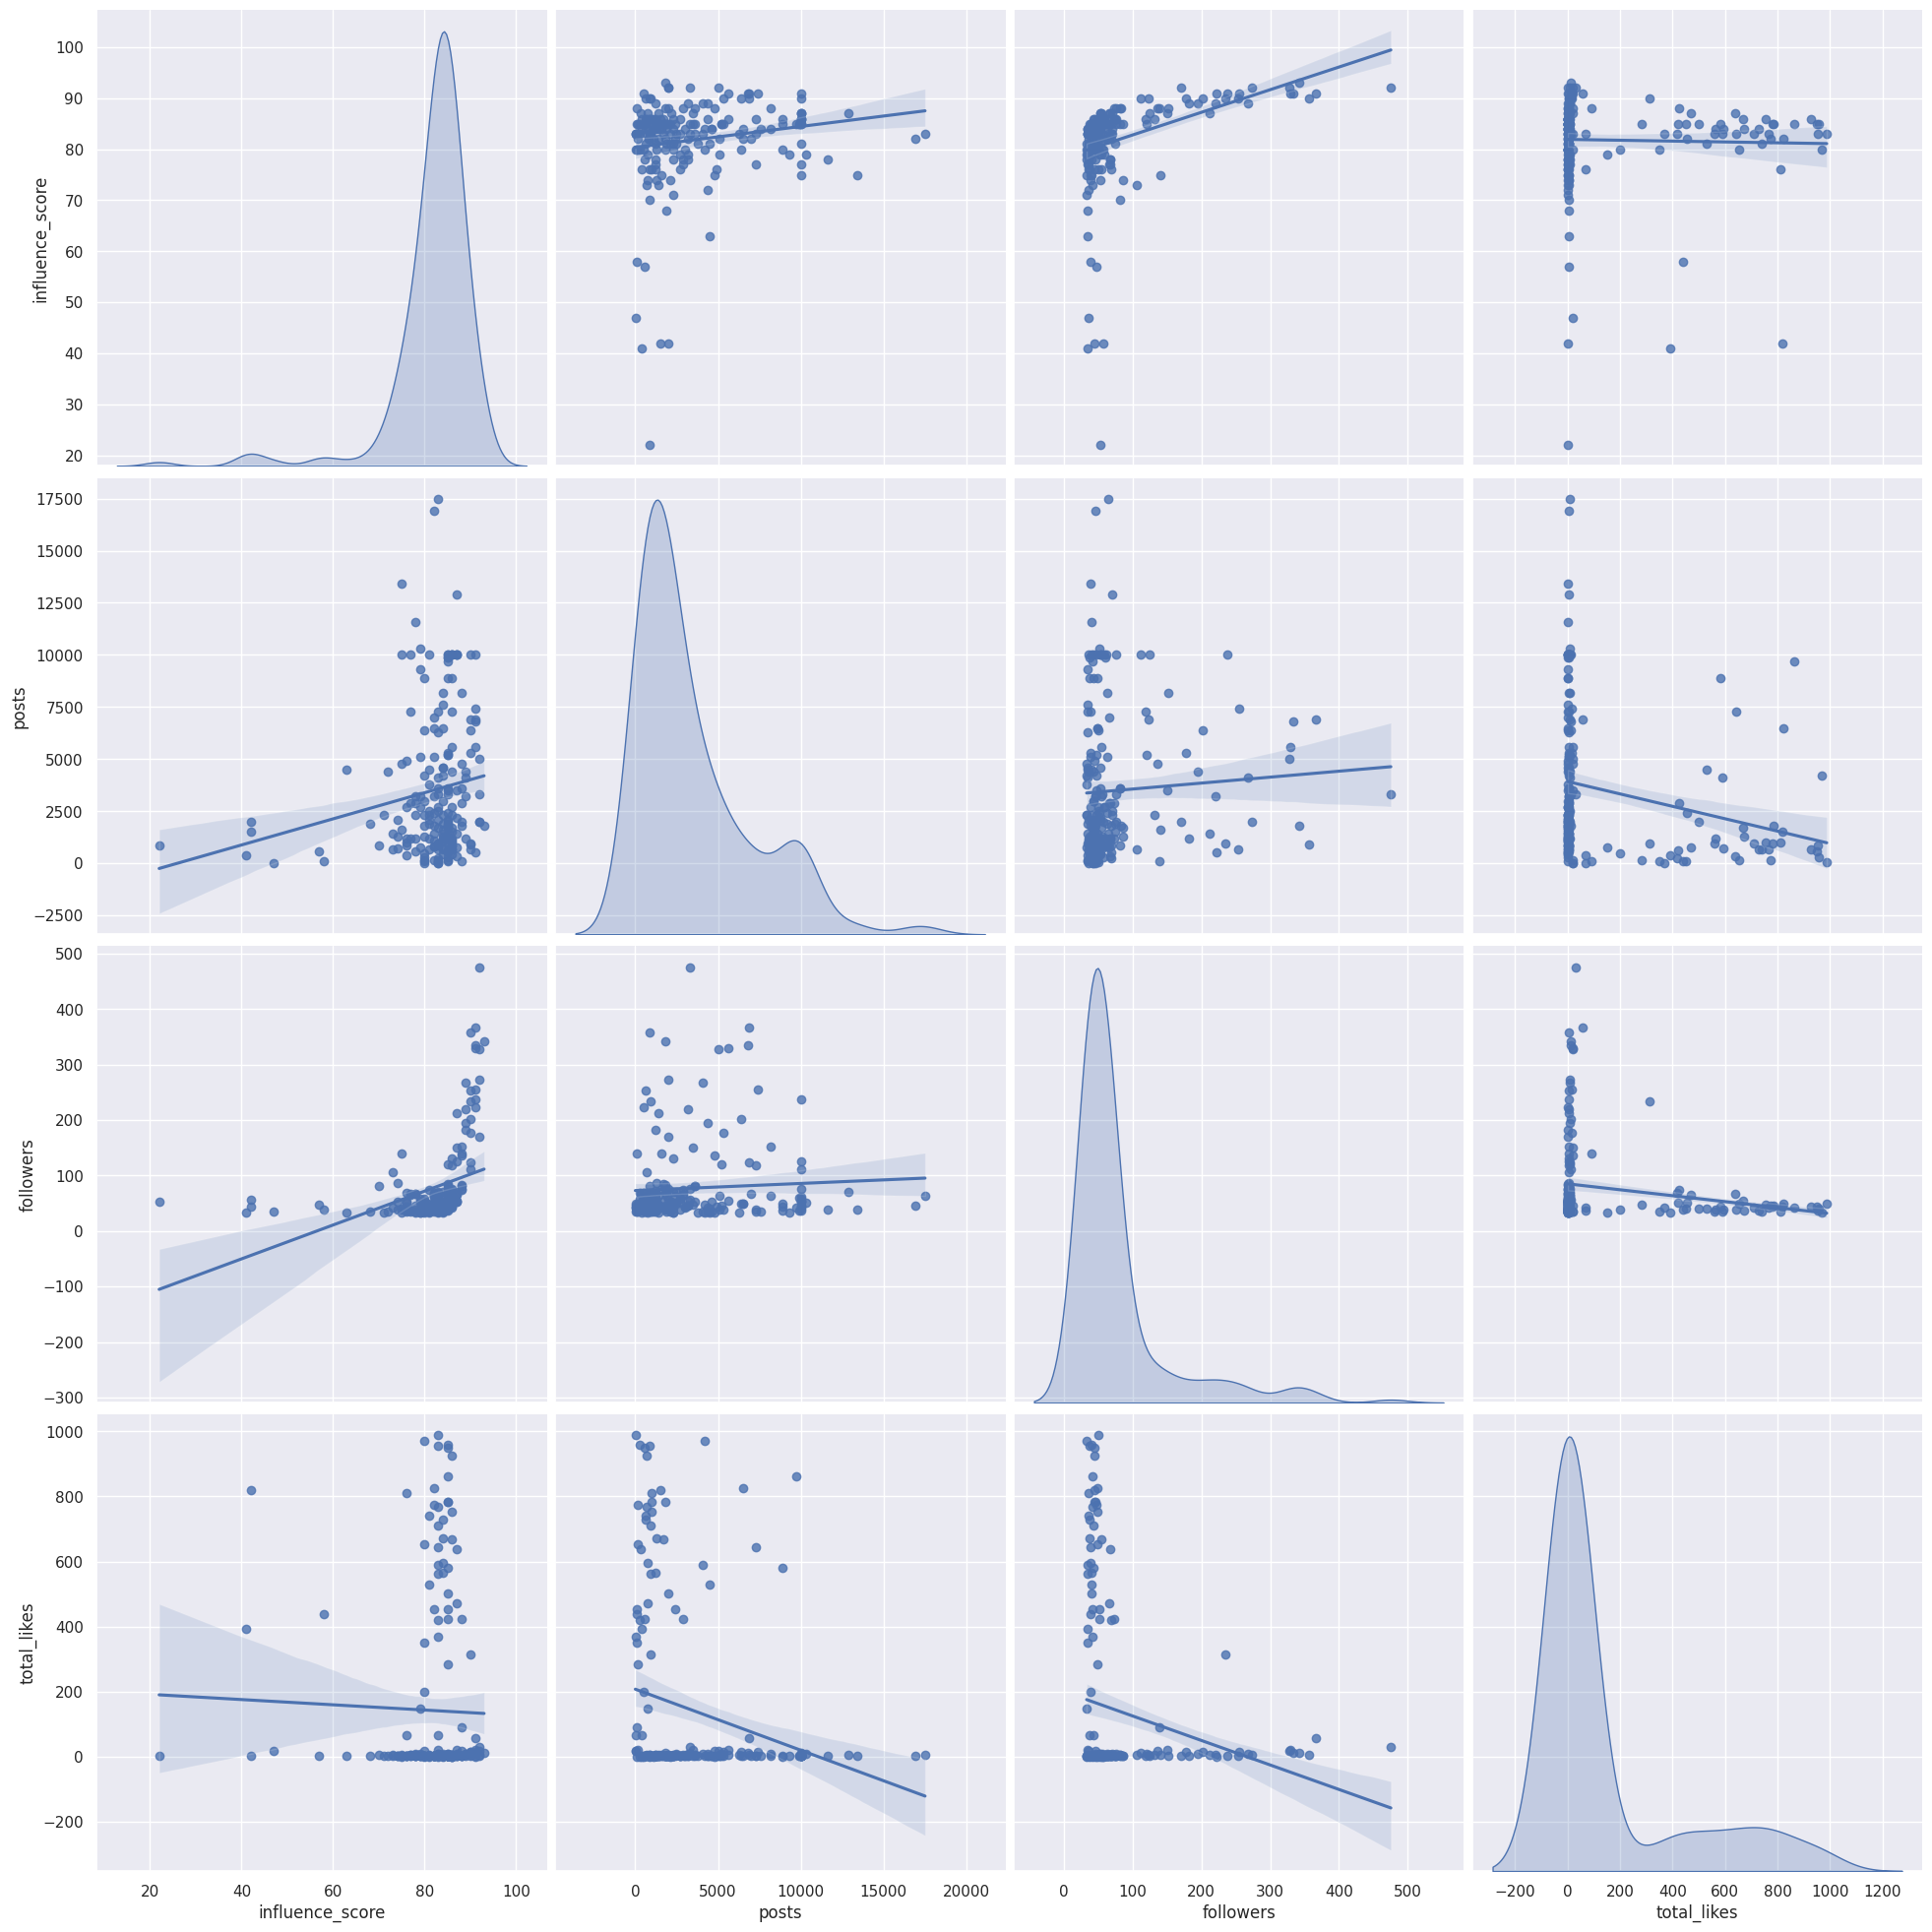

In [67]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

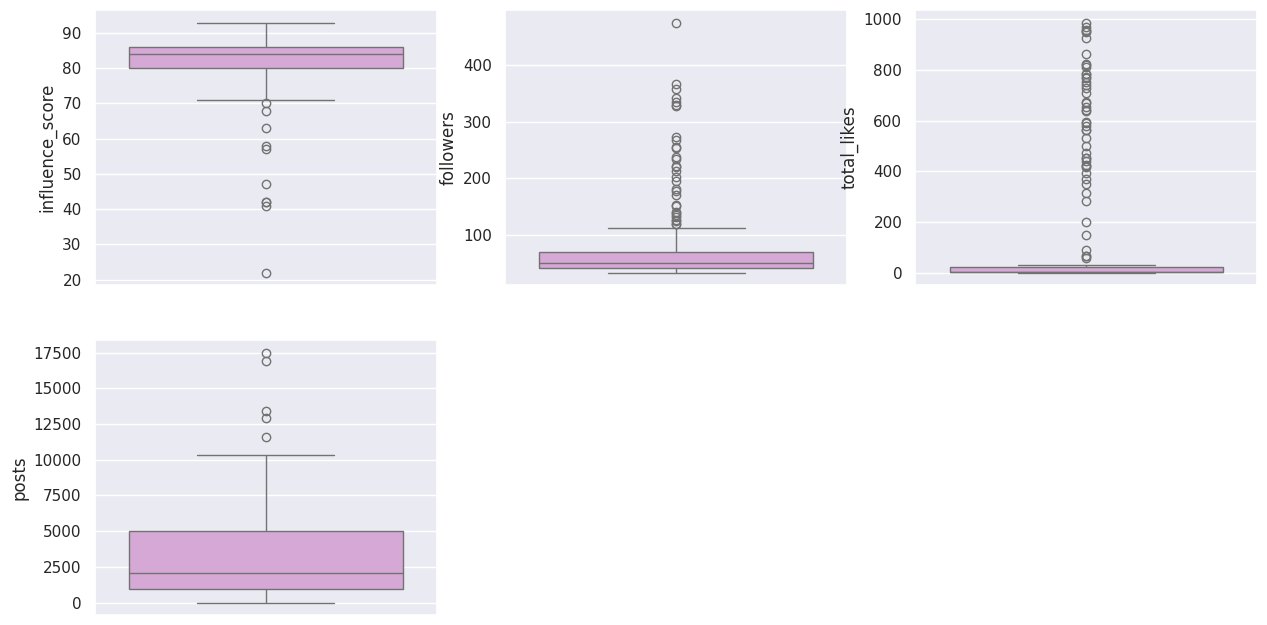

In [68]:
i=1
plt.figure(figsize=(15,25))
for feature in num_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature],color='#DDA0DD')
    i+=1

In [69]:
Country=list(train['country'])
Country1=list()
for val in Country:
  if Country.count(val)>10:
    Country1.append(1)
  elif 10>=Country.count(val)>1:
    Country1.append(2)
  else:
    Country1.append(3)

In [70]:
train['Country_rank']=Country1

In [71]:
train.drop('country',axis=1,inplace=True)

In [72]:
train.drop('channel_info',axis=1,inplace=True)

In [73]:
print(train.head())

      influence_score   posts  followers avg_likes 60_day_eng_rate  \
rank                                                                 
1                  92  3300.0      475.8      8.7m           1.39%   
2                  91  6900.0      366.2      8.3m           1.62%   
3                  90   890.0      357.3      6.8m           1.24%   
4                  93  1800.0      342.7      6.2m           0.97%   
5                  91  6800.0      334.1      1.9m           0.20%   

     new_post_avg_like  total_likes  Country_rank  
rank                                               
1                 6.5m         29.0             2  
2                 5.9m         57.4             1  
3                 4.4m          6.0             1  
4                 3.3m         11.5             1  
5               665.3k         12.5             1  


In [74]:
# Remove non-numeric characters from 'followers' column
train['avg_likes'] = train['avg_likes'].str.replace('[^0-9.]', '', regex=True)

# Convert 'followers' column to float
train['avg_likes'] = train['avg_likes'].astype(float)

In [75]:
train['60_day_eng_rate'].str.len() == 0

rank
1      False
2      False
3      False
4      False
5      False
       ...  
196    False
197    False
198    False
199    False
200    False
Name: 60_day_eng_rate, Length: 200, dtype: bool

In [90]:
train['60_day_eng_rate'] = train['60_day_eng_rate'].str.contains('[^0-9.]')

In [93]:
train = train[~train['60_day_eng_rate']]

In [94]:
train['60_day_eng_rate'] = train['60_day_eng_rate'].astype(float)

In [96]:
# Remove non-numeric characters from 'followers' column
train['new_post_avg_like'] = train['new_post_avg_like'].str.replace('[^0-9.]', '', regex=True)

# Convert 'followers' column to float
train['new_post_avg_like'] = train['new_post_avg_like'].astype(float)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

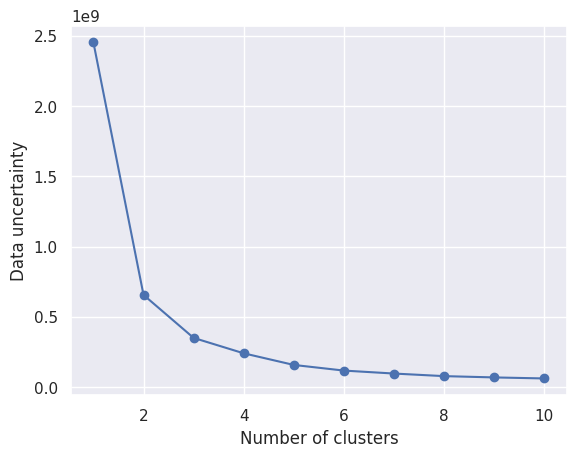

In [97]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(train)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss,'-o')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

In [98]:
num_col=['influence_score', 'followers', 'total_likes', 'posts']

In [102]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in num_col:
	stat, p = shapiro(train[feature])
	print('Statistics==%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

Statistics==0.674, p=0.000
Sample does not look Gaussian (reject H0)
Statistics==0.588, p=0.000
Sample does not look Gaussian (reject H0)
Statistics==0.565, p=0.000
Sample does not look Gaussian (reject H0)
Statistics==0.832, p=0.000
Sample does not look Gaussian (reject H0)


In [103]:
import scipy.stats

# u : Mann-Whitney test statistic
# p : p-value
for feature in num_col:
  u, p = scipy.stats.mannwhitneyu(train['Country_rank'], train[feature])
  print('With',feature)
  print('Mann-Whitney test statistic:',u)
  print('p-value:',p)

With influence_score
Mann-Whitney test statistic: 0.0
p-value: 5.144532715944765e-71
With followers
Mann-Whitney test statistic: 0.0
p-value: 5.917875835183602e-71
With total_likes
Mann-Whitney test statistic: 2782.5
p-value: 3.901272000843143e-53
With posts
Mann-Whitney test statistic: 0.0
p-value: 5.858201267623425e-71


In [105]:
correlation = train.corr()
print(correlation['total_likes'].sort_values(ascending = False),'\n')

total_likes          1.000000
avg_likes            0.027336
new_post_avg_like    0.020897
Country_rank        -0.008279
influence_score     -0.025862
followers           -0.200495
posts               -0.236321
60_day_eng_rate           NaN
Name: total_likes, dtype: float64 



Index(['total_likes', 'avg_likes', 'new_post_avg_like', 'Country_rank',
       'influence_score', 'followers', 'posts', '60_day_eng_rate'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


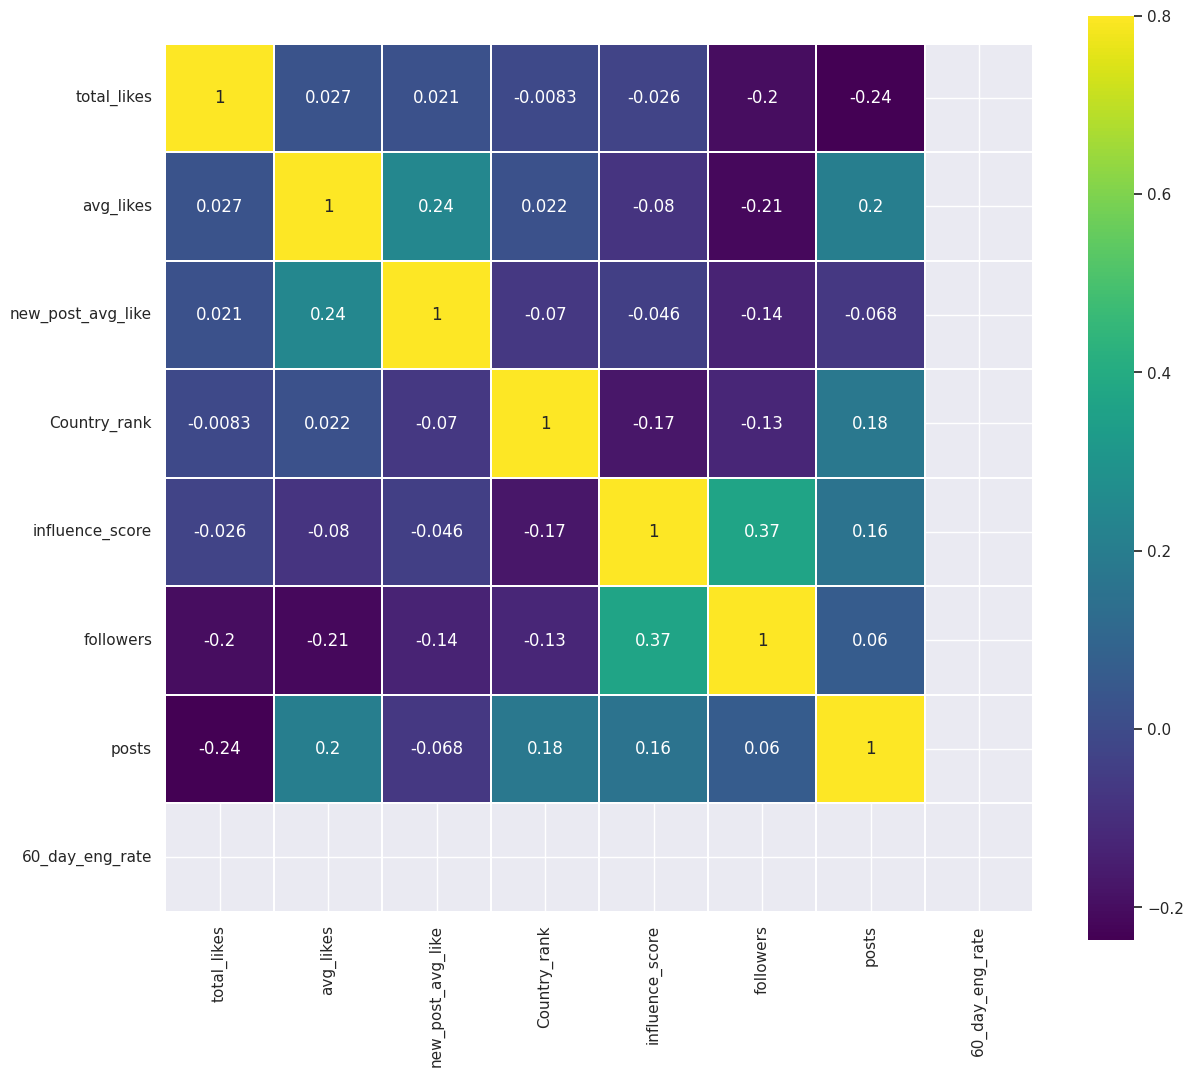

In [106]:
k= 10
cols = correlation.nlargest(k,'total_likes')['total_likes'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()